Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2024/2025  
https://www.fer.unizg.hr/predmet/map_a

### Prva laboratorijska vježba - Geometrija uzorka, slučajno uzorkovanje, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 6. travnja 2025. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima. Kôd možete pisati u Pythonu ili R-u. Ako koristite R, instalirajte potrebne alate za njegovo pokretanje u Jupyter bilježnici (npr. [link](https://www.freecodecamp.org/news/how-to-run-r-programs-directly-in-jupyter-notebook-locally/)). Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.

**Predaja**: Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb. Rok za predaju je 6. travnja 2025. u 23:59.

**Bodovanje**: Svoje rješenje branite usmeno na terminima koji su vam dodijeljeni u kalendaru. Vježba nosi 10 bodova, pri čemu je naglasak na usmenoj obrani i interpretaciji rješenja.  Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.

**Napomena**: Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno ostvariti barem 10 od ukupnih 30 bodova iz laboratorijskih vježbi. Nadoknade laboratorijskih vježbi neće biti organizirane.

Za sva dodatna pitanja javite se na: _map@fer.hr_.

------------------------------

In [40]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente

import random

random.seed(42)

### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
12 & 5 & 3 \\
8 & 3 & 7 \\
9 & 2 & 4 \\ 
7 & 2 & 5  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean

X = np.array([[12, 5, 3],
              [8, 3, 7],
              [9, 2, 4],
              [7, 2, 5]])

# Izračun vektora srednjih vrijednosti
x_bar = np.mean(X, axis=0)
print("Uzorački vektor srednjih vrijednosti:")
print(x_bar)

# Izračun matrice kovarijance
n = X.shape[0]  # broj opservacija
S = np.cov(X, rowvar=False, bias=False)  # rowvar=False koristi redove kao opservacije
print("\nUzoračka matrica kovarijance:")
print(S)

# Izračun matrice korelacije
R = np.corrcoef(X, rowvar=False)
print("\nUzoračka matrica korelacije:")
print(R)

Uzorački vektor srednjih vrijednosti:
[9.   3.   4.75]

Uzoračka matrica kovarijance:
[[ 4.66666667  2.66666667 -2.66666667]
 [ 2.66666667  2.         -1.        ]
 [-2.66666667 -1.          2.91666667]]

Uzoračka matrica korelacije:
[[ 1.          0.87287156 -0.72280632]
 [ 0.87287156  1.         -0.41403934]
 [-0.72280632 -0.41403934  1.        ]]


Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

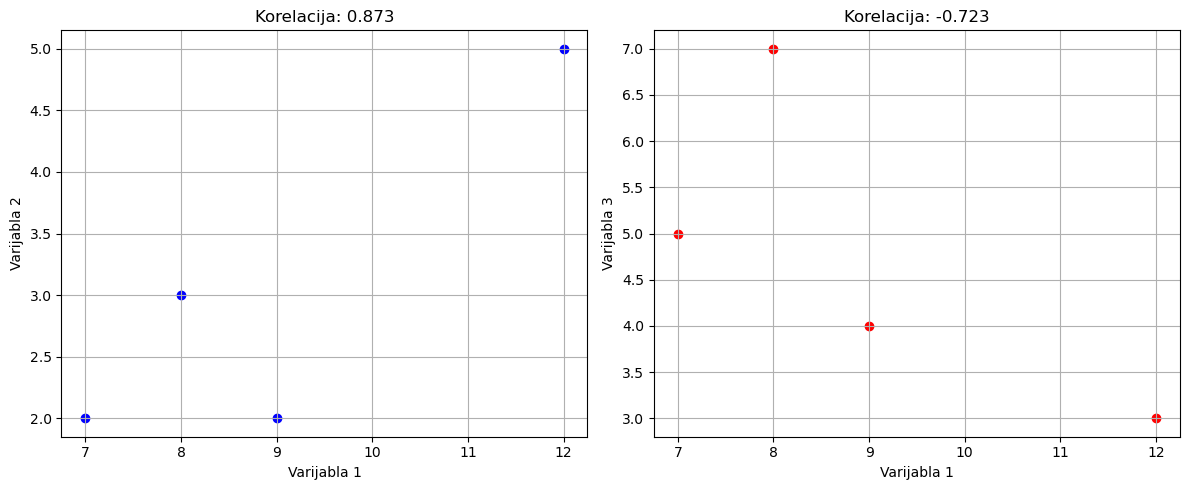

In [42]:
# Vizualizacija grafova raspršenja
plt.figure(figsize=(12, 5))

# Graf raspršenja između prve i druge varijable
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.xlabel('Varijabla 1')
plt.ylabel('Varijabla 2')
plt.title(f'Korelacija: {R[0, 1]:.3f}')
plt.grid(True)

# Graf raspršenja između prve i treće varijable
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 2], color='red')
plt.xlabel('Varijabla 1')
plt.ylabel('Varijabla 3')
plt.title(f'Korelacija: {R[0, 2]:.3f}')
plt.grid(True)

plt.tight_layout()
plt.show()

 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)}
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [43]:
x1 = X[0, :]  # prva opservacija
x4 = X[3, :]  # zadnja opservacija
diff = x1 - x4
S_inv = np.linalg.inv(S)  # inverz matrice kovarijance
stat_dist = np.sqrt(diff @ S_inv @ diff) # mogli smo i preko importa (from scipy.spatial.distance import mahalanobis)
print("\nStatistička udaljenost između prve i zadnje opservacije:")
print(f"d(x1, x4) = {stat_dist:.4f}")

# izračun euklidske udaljenosti za usporedbu
euc_dist = euclidean(x1, x4)
print("\nEuklidska udaljenost između prve i zadnje opservacije:")
print(f"d_euc(x1, x4) = {euc_dist:.4f}")


Statistička udaljenost između prve i zadnje opservacije:
d(x1, x4) = 2.4495

Euklidska udaljenost između prve i zadnje opservacije:
d_euc(x1, x4) = 6.1644


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

In [44]:
d = []  # lista za vektore devijacija
std_devs = []  # lista za standardne devijacije

for i in range(X.shape[1]):
    # Izračun vektora devijacija
    xi = X[:, i].reshape(-1, 1)  # vektor vrijednosti varijable i
    x_bar_i = x_bar[i]  # srednja vrijednost varijable i
    ones = np.ones((n, 1))  # vektor jedinica
    di = xi - x_bar_i * ones  # vektor devijacija
    d.append(di)
    
    # Izračun duljine vektora devijacija
    length_di = np.sqrt(np.sum(di**2))
    
    # Izračun standardne devijacije
    std_dev_i = np.std(X[:, i], ddof=1)  # nepristrani procjenitelj
    std_devs.append(std_dev_i)
    
    print(f"\nVektor devijacija za varijablu {i+1}:")
    print(di.flatten())
    print(f"Duljina vektora devijacija: {length_di:.4f}")
    print(f"Standardna devijacija: {std_dev_i:.4f}")
    print(f"Odnos duljine i std. dev.: {length_di/std_dev_i:.4f}")


Vektor devijacija za varijablu 1:
[ 3. -1.  0. -2.]
Duljina vektora devijacija: 3.7417
Standardna devijacija: 2.1602
Odnos duljine i std. dev.: 1.7321

Vektor devijacija za varijablu 2:
[ 2.  0. -1. -1.]
Duljina vektora devijacija: 2.4495
Standardna devijacija: 1.4142
Odnos duljine i std. dev.: 1.7321

Vektor devijacija za varijablu 3:
[-1.75  2.25 -0.75  0.25]
Duljina vektora devijacija: 2.9580
Standardna devijacija: 1.7078
Odnos duljine i std. dev.: 1.7321


#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

In [45]:
S_reconstructed = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        S_reconstructed[i, j] = (d[i].T @ d[j]) / (n-1)

print("\nRekonstruirana matrica kovarijance:")
print(S_reconstructed)
print("\nOriginalna matrica kovarijance:")
print(S)
print("\nJesu li matrice jednake?", np.allclose(S, S_reconstructed))

R_reconstructed = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        R_reconstructed[i, j] = (d[i].T @ d[j]) / (np.sqrt((d[i].T @ d[i]) * (d[j].T @ d[j])))

print("\nRekonstruirana matrica korelacije:")
print(R_reconstructed)
print("\nOriginalna matrica korelacije:")
print(R)
print("\nJesu li matrice jednake?", np.allclose(R, R_reconstructed))


Rekonstruirana matrica kovarijance:
[[ 4.66666667  2.66666667 -2.66666667]
 [ 2.66666667  2.         -1.        ]
 [-2.66666667 -1.          2.91666667]]

Originalna matrica kovarijance:
[[ 4.66666667  2.66666667 -2.66666667]
 [ 2.66666667  2.         -1.        ]
 [-2.66666667 -1.          2.91666667]]

Jesu li matrice jednake? True

Rekonstruirana matrica korelacije:
[[ 1.          0.87287156 -0.72280632]
 [ 0.87287156  1.         -0.41403934]
 [-0.72280632 -0.41403934  1.        ]]

Originalna matrica korelacije:
[[ 1.          0.87287156 -0.72280632]
 [ 0.87287156  1.         -0.41403934]
 [-0.72280632 -0.41403934  1.        ]]

Jesu li matrice jednake? True


/var/folders/r9/8978q51j18q86xffn7qcdglm0000gn/T/ipykernel_76743/3616237834.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S_reconstructed[i, j] = (d[i].T @ d[j]) / (n-1)
/var/folders/r9/8978q51j18q86xffn7qcdglm0000gn/T/ipykernel_76743/3616237834.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R_reconstructed[i, j] = (d[i].T @ d[j]) / (np.sqrt((d[i].T @ d[i]) * (d[j].T @ d[j])))


#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [46]:
# (d) Izračun generalizirane varijance originalnog uzorka
gen_var = np.linalg.det(S)
print("\nGeneralizirana varijanca |S| originalnog uzorka:")
print(gen_var)

# Dodavanje nove varijable koja je linearna kombinacija prve i druge
X_new = np.column_stack((X, X[:, 0] + X[:, 1]))
S_new = np.cov(X_new, rowvar=False, bias=False)
gen_var_new = np.linalg.det(S_new)
print("\nGeneralizirana varijanca uzorka s dodanom linearnom kombinacijom:")
print(gen_var_new)


Generalizirana varijanca |S| originalnog uzorka:
1.814814814814817

Generalizirana varijanca uzorka s dodanom linearnom kombinacijom:
2.433746693009364e-15


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vrijednosti na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [47]:
# Uklanjanje zadnje opservacije
X_reduced = X[:3, :]
S_reduced = np.cov(X_reduced, rowvar=False, bias=False)
gen_var_reduced = np.linalg.det(S_reduced)
eigenvalues_reduced = np.linalg.eigvals(S_reduced)

print("\nGeneralizirana varijanca uzorka bez zadnje opservacije:")
print(gen_var_reduced)
print("\nSvojstvene vrijednosti matrice kovarijance bez zadnje opservacije:")
print(eigenvalues_reduced)


Generalizirana varijanca uzorka bez zadnje opservacije:
-3.621035095700492e-15

Svojstvene vrijednosti matrice kovarijance bez zadnje opservacije:
[ 9.18555740e+00 -9.63495885e-16  1.81444260e+00]


Iz ovih rezultata možemo zaključiti:

1. **Utjecaj linearne zavisnosti**: Kada smo dodali novu varijablu koja je linearna kombinacija postojećih (X[:, 0] + X[:, 1]), generalizirana varijanca |S| je pala s 1.8148 na približno 2.43×10⁻¹⁵, što je praktički 0. Ovo potvrđuje da dodavanje linearne kombinacije postojećih varijabli čini matricu kovarijance singularnom (ili približno singularnom), jer ne dodajemo novu nezavisnu informaciju u podatke.

2. **Utjecaj broja opservacija**: Kada smo uklonili zadnju opservaciju, imamo 3 opservacije za 3 varijable (n = p), što čini procjenu matrice kovarijance nestabilnom. Generalizirana varijanca je negativna (-3.62×10⁻¹⁵), što je numerički artefakt - determinanta bi trebala biti 0 ili pozitivan broj. Negativna vrijednost blizu nule ukazuje na numeričku nestabilnost izračuna.

3. **Svojstvene vrijednosti**: Svojstvene vrijednosti matrice kovarijance bez zadnje opservacije su [9.19, ~0, 1.81]. Postojanje svojstvene vrijednosti blizu nule potvrđuje da je matrica kovarijance približno singularna, što znači da postoji približna linearna zavisnost među varijablama.

Ovi rezultati potvrđuju teorijske zaključke:
- Linearna zavisnost među varijablama uzrokuje singularnost matrice kovarijance
- Premali broj opservacija u odnosu na broj varijabli vodi do nestabilne procjene matrice kovarijance
- Obje situacije rezultiraju determinantom blizu nule, što znači da se efektivno gubi jedna dimenzija u prostoru podataka

### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [48]:
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Zadani parametri
mu = np.array([2, 3])
Sigma = np.array([[10**2, 6**2],
                  [6**2, 6**2]])

#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

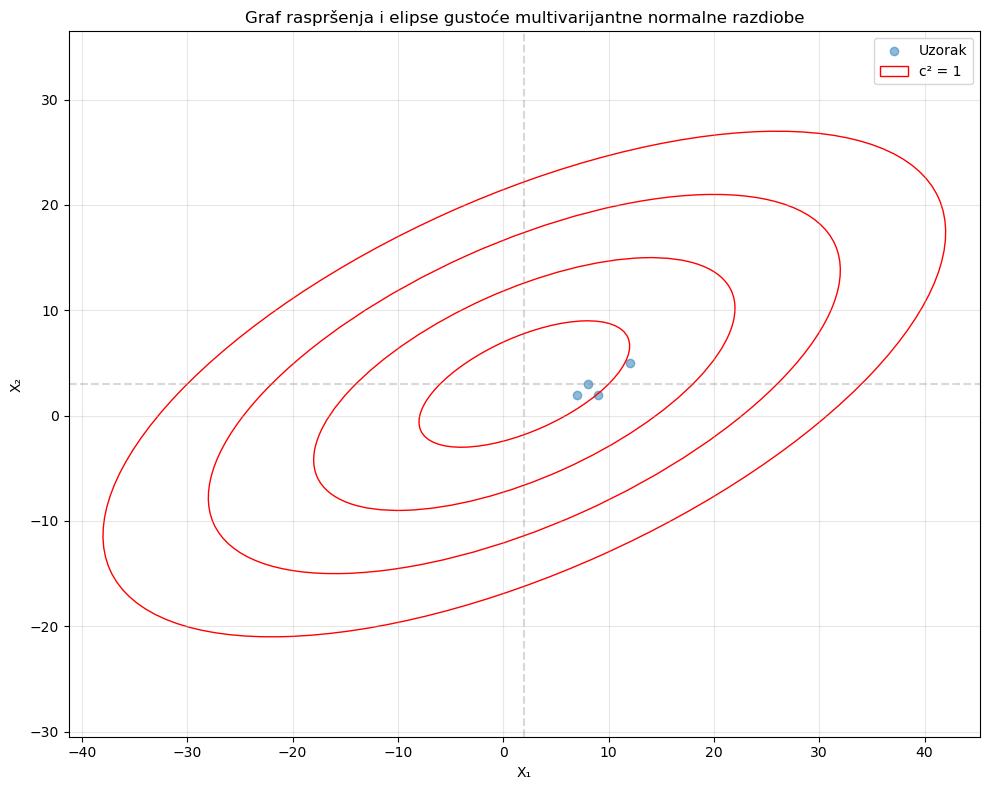

" Countour funkcija\nplt.figure(figsize=(10, 8))\n\n# Definiranje mreže točaka\nx = np.linspace(mu[0] - 4*np.sqrt(Sigma[0, 0]), mu[0] + 4*np.sqrt(Sigma[0, 0]), 100)\ny = np.linspace(mu[1] - 4*np.sqrt(Sigma[1, 1]), mu[1] + 4*np.sqrt(Sigma[1, 1]), 100)\nX_grid, Y_grid = np.meshgrid(x, y)\npos = np.dstack((X_grid, Y_grid))\n\n# Izračun gustoće vjerojatnosti\nrv = multivariate_normal(mu, Sigma)\nZ = rv.pdf(pos)\n\n# Računanje vrijednosti c² za konture\n# Želimo prikazati konture koje odgovaraju jednakim c² vrijednostima\n# Moramo pretvoriti vrijednosti gustoće vjerojatnosti u odgovarajuće c² vrijednosti\n\nplt.scatter(X[:, 0], X[:, 1], alpha=0.3)\n\n# Direktno crtanje kontura za konstantne c² vrijednosti\nlevels = [1, 2, 3, 4]\nplt.contour(X_grid, Y_grid, (pos[:,:,0]-mu[0])**2/Sigma[0,0] + \n                           (pos[:,:,1]-mu[1])**2/Sigma[1,1] - \n                           2*(pos[:,:,0]-mu[0])*(pos[:,:,1]-mu[1])*Sigma[0,1]/(Sigma[0,0]*Sigma[1,1]),\n            levels=levels, colors

In [49]:
# DICLAIMER: Koristio sam LLM za dio ovog koda

# Funkcija za crtanje elipse povjerenja
def confidence_ellipse(cov, mean, ax, n_std=1.0, **kwargs):
    """
    Crtanje elipse povjerenja za zadanu matricu kovarijance
    """
    # Izračun svojstvenih vrijednosti i vektora
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Velika i mala os elipse
    width, height = 2 * n_std * np.sqrt(eigvals)
    
    # Kut rotacije (u stupnjevima)
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Stvaranje elipse
    ellipse = Ellipse(xy=mean, width=width, height=height,
                      angle=angle, **kwargs)
    
    return ax.add_patch(ellipse)

# Prikaz grafa raspršenja
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Uzorak')

# Dodavanje elipsi gustoće za različite vrijednosti c²
c_values = [1, 2, 3, 4]  # Različite vrijednosti c²

for c in c_values:
    confidence_ellipse(Sigma, mu, plt.gca(), n_std=c, 
                      edgecolor='red', facecolor='none', 
                      label=f'c² = {c}' if c == 1 else "")

# Oznake i formatiranje
plt.axvline(mu[0], color='gray', linestyle='--', alpha=0.3)
plt.axhline(mu[1], color='gray', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.axis('equal')  # Iste skale na obje osi
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.title('Graf raspršenja i elipse gustoće multivarijantne normalne razdiobe')
plt.legend()
plt.tight_layout()
plt.show()

''' Countour funkcija
plt.figure(figsize=(10, 8))

# Definiranje mreže točaka
x = np.linspace(mu[0] - 4*np.sqrt(Sigma[0, 0]), mu[0] + 4*np.sqrt(Sigma[0, 0]), 100)
y = np.linspace(mu[1] - 4*np.sqrt(Sigma[1, 1]), mu[1] + 4*np.sqrt(Sigma[1, 1]), 100)
X_grid, Y_grid = np.meshgrid(x, y)
pos = np.dstack((X_grid, Y_grid))

# Izračun gustoće vjerojatnosti
rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos)

# Računanje vrijednosti c² za konture
# Želimo prikazati konture koje odgovaraju jednakim c² vrijednostima
# Moramo pretvoriti vrijednosti gustoće vjerojatnosti u odgovarajuće c² vrijednosti

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

# Direktno crtanje kontura za konstantne c² vrijednosti
levels = [1, 2, 3, 4]
plt.contour(X_grid, Y_grid, (pos[:,:,0]-mu[0])**2/Sigma[0,0] + 
                           (pos[:,:,1]-mu[1])**2/Sigma[1,1] - 
                           2*(pos[:,:,0]-mu[0])*(pos[:,:,1]-mu[1])*Sigma[0,1]/(Sigma[0,0]*Sigma[1,1]),
            levels=levels, colors='red')

plt.axvline(mu[0], color='gray', linestyle='--', alpha=0.3)
plt.axhline(mu[1], color='gray', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.title('Graf raspršenja i konture jednakih c² vrijednosti')
plt.tight_layout()
plt.show()
'''

#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

Σ₁ je pozitivno definitna: True
Svojstvene vrijednosti Σ₁: [136.  64.]
Determinanta Σ₁: 8704.000000000015

Σ₂ je pozitivno definitna: True
Svojstvene vrijednosti Σ₂: [126.52349955   9.47650045]
Determinanta Σ₂: 1198.9999999999998

Σ₃ je pozitivno definitna: False
Svojstvene vrijednosti Σ₃: [139.55417528  -3.55417528]
Determinanta Σ₃: -496.00000000000017



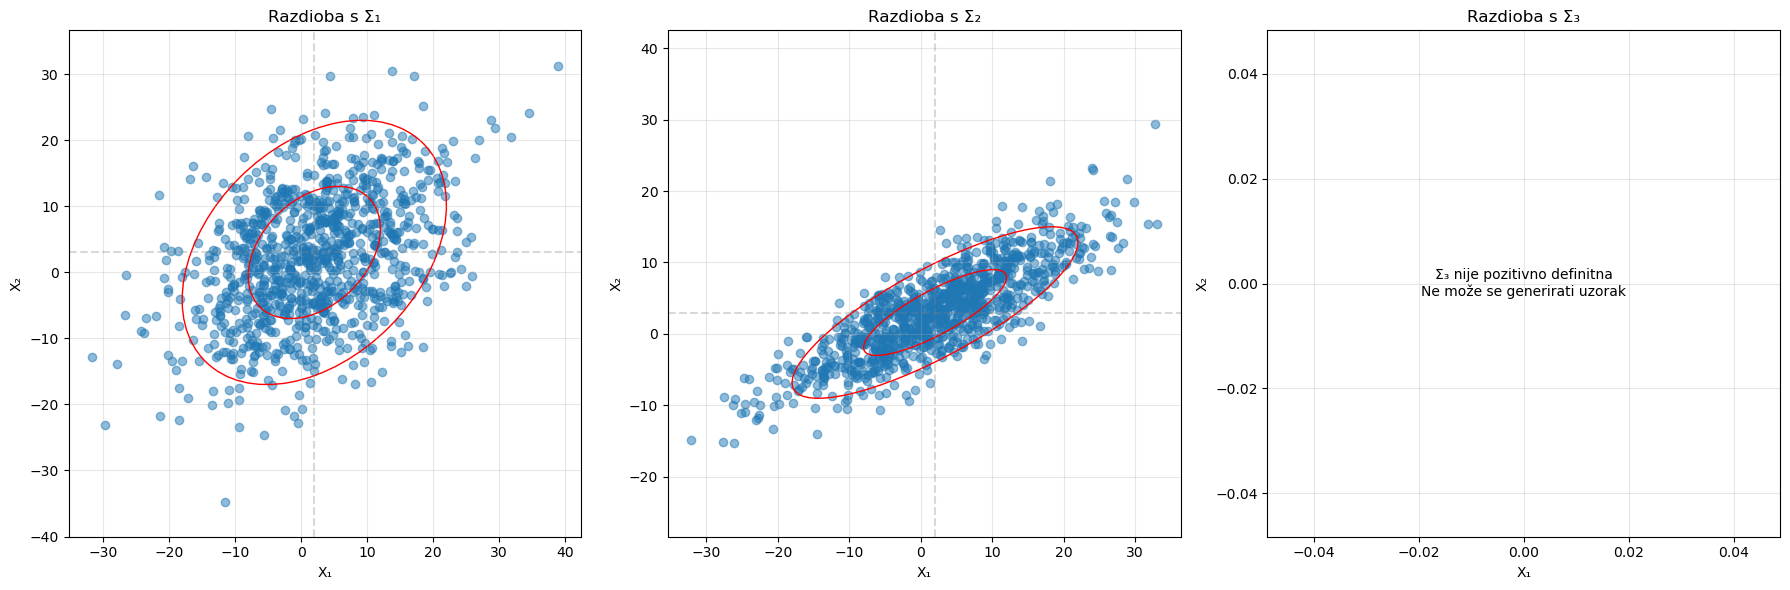

In [50]:
# Definiranje različitih matrica kovarijanci
Sigma1 = np.array([[10**2, 6**2],
                   [6**2, 10**2]])
Sigma2 = np.array([[10**2, 7**2],
                   [7**2, 6**2]])
Sigma3 = np.array([[10**2, 8**2],
                   [8**2, 6**2]])

# Provjera pozitivne definitnosti matrica kovarijanci
def is_positive_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

matrices = {"Σ₁": Sigma1, "Σ₂": Sigma2, "Σ₃": Sigma3}
for name, matrix in matrices.items():
    eigvals = np.linalg.eigvals(matrix)
    print(f"{name} je pozitivno definitna: {is_positive_definite(matrix)}")
    print(f"Svojstvene vrijednosti {name}: {eigvals}")
    print(f"Determinanta {name}: {np.linalg.det(matrix)}")
    print()

# Generiranje uzoraka i prikaz grafova raspršenja za sve matrice
plt.figure(figsize=(18, 6))

for i, (name, sigma) in enumerate(matrices.items()):
    plt.subplot(1, 3, i+1)
    
    if is_positive_definite(sigma):
        # Generiranje uzorka
        sample = np.random.multivariate_normal(mu, sigma, size=1000)
        
        # Prikaz grafa raspršenja
        plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5)
        
        # Dodavanje elipsi gustoće
        confidence_ellipse(sigma, mu, plt.gca(), n_std=1, edgecolor='red', facecolor='none')
        confidence_ellipse(sigma, mu, plt.gca(), n_std=2, edgecolor='red', facecolor='none')
        
        plt.axvline(mu[0], color='gray', linestyle='--', alpha=0.3)
        plt.axhline(mu[1], color='gray', linestyle='--', alpha=0.3)
    else:
        plt.text(0.5, 0.5, f"{name} nije pozitivno definitna\nNe može se generirati uzorak", 
                 ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.xlabel('X₁')
    plt.ylabel('X₂')
    plt.title(f'Razdioba s {name}')

plt.tight_layout()
plt.show()

#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, (1/n)\mathbf{\Sigma}_r)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [51]:
# Teorijski izračun parametara za Xr = X1 - X2
mu_r_theo = np.zeros_like(mu)  # Očekivanje razlike je 0
Sigma_r_theo = Sigma1 + Sigma2  # Kovarijanca sume nezavisnih varijabli je suma kovarijanci

# Procjena parametara uzorkovanjem
n_large = 10**7
X1_large = np.random.multivariate_normal(mu, Sigma1, size=n_large)
X2_large = np.random.multivariate_normal(mu, Sigma2, size=n_large)
Xr_large = X1_large - X2_large

# Procjena parametara iz velikog uzorka
mu_r_est_large = np.mean(Xr_large, axis=0)
Sigma_r_est_large = np.cov(Xr_large, rowvar=False)

print("Teorijski parametri za Xr = X1 - X2:")
print(f"μr = {mu_r_theo}")
print(f"Σr = \n{Sigma_r_theo}")
print("\nProcijenjeni parametri iz velikog uzorka (n=10^7):")
print(f"μr_est = {mu_r_est_large}")
print(f"Σr_est = \n{Sigma_r_est_large}")

# Procjena parametara procjenitelja X̄r
K = 10**5 
n_small = 100 
sample_means = np.zeros((K, 2))

for k in range(K):
    X1_sample = np.random.multivariate_normal(mu, Sigma1, size=n_small)
    X2_sample = np.random.multivariate_normal(mu, Sigma2, size=n_small)
    Xr_sample = X1_sample - X2_sample
    sample_means[k] = np.mean(Xr_sample, axis=0)

# Procjena parametara procjenitelja
mu_r_bar = np.mean(sample_means, axis=0)
Sigma_r_bar = np.cov(sample_means, rowvar=False)

# Teorijski parametri procjenitelja
Sigma_r_bar_theo = Sigma_r_theo / n_small

print("\nTeorijski parametri procjenitelja X̄r:")
print(f"μ(X̄r) = {mu_r_theo}")
print(f"Σ(X̄r) = (1/{n_small})Σr = \n{Sigma_r_bar_theo}")
print("\nProcijenjeni parametri procjenitelja X̄r iz K=10^5 uzoraka veličine n=100:")
print(f"μ̂(X̄r) = {mu_r_bar}")
print(f"Σ̂(X̄r) = \n{Sigma_r_bar}")

Teorijski parametri za Xr = X1 - X2:
μr = [0 0]
Σr = 
[[200  85]
 [ 85 136]]

Procijenjeni parametri iz velikog uzorka (n=10^7):
μr_est = [-0.00470091  0.00132601]
Σr_est = 
[[200.03881386  84.97106876]
 [ 84.97106876 136.08109486]]

Teorijski parametri procjenitelja X̄r:
μ(X̄r) = [0 0]
Σ(X̄r) = (1/100)Σr = 
[[2.   0.85]
 [0.85 1.36]]

Procijenjeni parametri procjenitelja X̄r iz K=10^5 uzoraka veličine n=100:
μ̂(X̄r) = [ 1.43302819e-03 -2.83314113e-06]
Σ̂(X̄r) = 
[[1.99628499 0.84942031]
 [0.84942031 1.36047799]]


### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

In [52]:
mu_0 = np.array([2, 3])
Sigma = np.array([[10**2, 7**2],
                  [7**2, 6**2]])

n = 1000
X = np.random.multivariate_normal(mu_0, Sigma, size=n)

In [53]:
xbar = np.mean(X, axis=0)
S = np.cov(X, rowvar=False)

print("Vektor srednjih vrijednosti uzorka:")
print(xbar)
print("\nMatrica kovarijance uzorka:")
print(S)

Vektor srednjih vrijednosti uzorka:
[2.01083246 3.08554423]

Matrica kovarijance uzorka:
[[107.44834812  51.06712774]
 [ 51.06712774  36.44647516]]


#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [54]:
from scipy import stats

T2 = n * (xbar - mu_0).T @ np.linalg.inv(S) @ (xbar - mu_0)
p = 2  # broj varijabli
F_stat = (n - p) / ((n - 1) * p) * T2
F_crit = stats.f.ppf(1 - 0.05, p, n - p)
p_value = 1 - stats.f.cdf(F_stat, p, n - p)

print("\nTestiranje hipoteze H_0: mu = [2, 3] vs H_1: mu != [2, 3]")
print(f"Hotellingov T^2: {T2:.4f}")
print(f"F-statistika: {F_stat:.4f}")
print(f"Kritična vrijednost F ({p}, {n-p}) za alpha=0.05: {F_crit:.4f}")
print(f"p-vrijednost: {p_value:.4f}")

if p_value < 0.05:
    print("Odbacujemo H_0 na razini značajnosti 0.05")
else:
    print("Ne možemo odbaciti H_0 na razini značajnosti 0.05")


Testiranje hipoteze H_0: mu = [2, 3] vs H_1: mu != [2, 3]
Hotellingov T^2: 0.5319
F-statistika: 0.2657
Kritična vrijednost F (2, 998) za alpha=0.05: 3.0047
p-vrijednost: 0.7667
Ne možemo odbaciti H_0 na razini značajnosti 0.05


#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

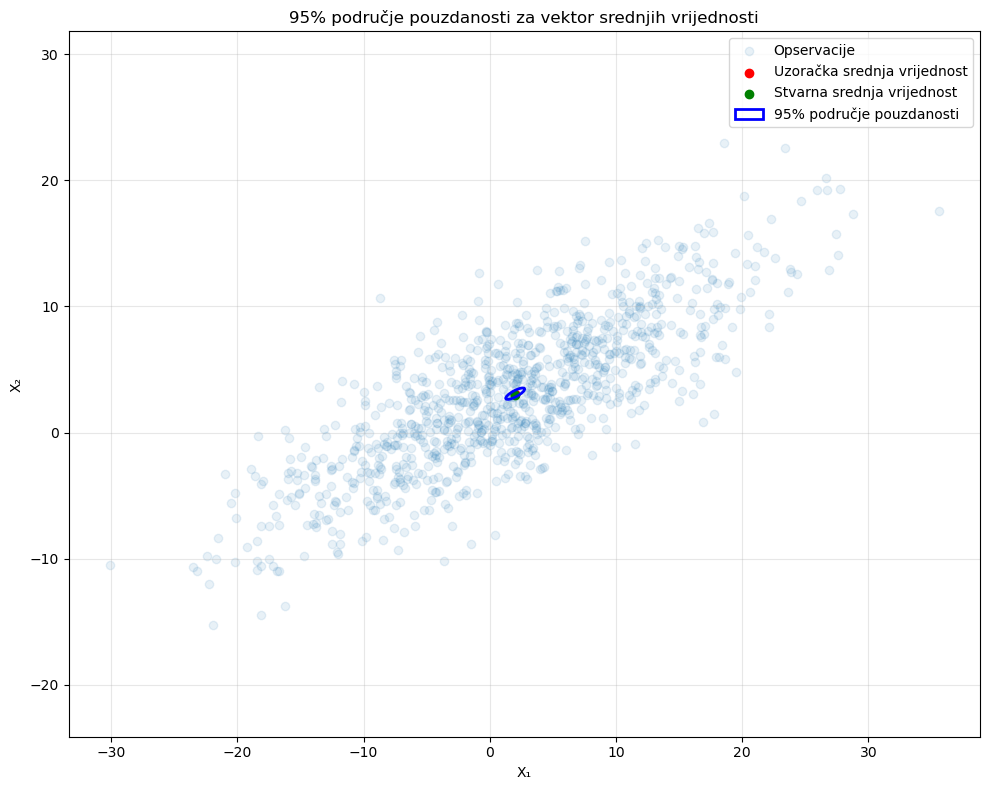

In [63]:
# (b) 95%-tno područje pouzdanosti za mu
# Vizualizacija područja pouzdanosti
plt.figure(figsize=(10, 8))

# Prikaz točaka
plt.scatter(X[:, 0], X[:, 1], alpha=0.1, label='Opservacije')
plt.scatter(xbar[0], xbar[1], color='red', label='Uzoračka srednja vrijednost')
plt.scatter(mu_0[0], mu_0[1], color='green', label='Stvarna srednja vrijednost')

# Izračun parametara za elipsu pouzdanosti
c_square = F_crit * p * (n - 1) / (n - p)  # Kritična vrijednost za elipsu pouzdanosti
eigenvalues, eigenvectors = np.linalg.eigh(S)
theta = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
width = 2 * np.sqrt(c_square * eigenvalues[0] / n)
height = 2 * np.sqrt(c_square * eigenvalues[1] / n)

# Crtanje elipse pouzdanosti - dobijao sam error kad zovem confidence_ellipse
confidence_ellipse = plt.matplotlib.patches.Ellipse(
    xy=xbar, width=width, height=height, angle=theta,
    edgecolor='blue', fc='none', lw=2, label='95% područje pouzdanosti'
)
plt.gca().add_patch(confidence_ellipse)

plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.title('95% područje pouzdanosti za vektor srednjih vrijednosti')
plt.legend()
plt.tight_layout()
plt.show()

#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

In [64]:
import pandas as pd

# T^2 intervali
alpha = 0.05
T2_value = stats.f.ppf(1 - alpha, p, n - p) * p * (n - 1) / (n - p)
T2_radius = np.sqrt(T2_value / n)

# Granice za mu_1 i mu_2
t2_interval_mu1 = [xbar[0] - T2_radius * np.sqrt(S[0, 0]), xbar[0] + T2_radius * np.sqrt(S[0, 0])]
t2_interval_mu2 = [xbar[1] - T2_radius * np.sqrt(S[1, 1]), xbar[1] + T2_radius * np.sqrt(S[1, 1])]

# Granice za mu_2 - mu_1
var_diff = S[1, 1] + S[0, 0] - 2 * S[0, 1]
t2_interval_diff = [(xbar[1] - xbar[0]) - T2_radius * np.sqrt(var_diff),
                    (xbar[1] - xbar[0]) + T2_radius * np.sqrt(var_diff)]

print("\nT^2 intervali pouzdanosti (95%):")
print(f"Za μ₁: [{t2_interval_mu1[0]:.4f}, {t2_interval_mu1[1]:.4f}]")
print(f"Za μ₂: [{t2_interval_mu2[0]:.4f}, {t2_interval_mu2[1]:.4f}]")
print(f"Za μ₂-μ₁: [{t2_interval_diff[0]:.4f}, {t2_interval_diff[1]:.4f}]")

# Univarijatni t-intervali
t_crit = stats.t.ppf(1 - alpha/2, n - 1)
t_interval_mu1 = [xbar[0] - t_crit * np.sqrt(S[0, 0]/n), xbar[0] + t_crit * np.sqrt(S[0, 0]/n)]
t_interval_mu2 = [xbar[1] - t_crit * np.sqrt(S[1, 1]/n), xbar[1] + t_crit * np.sqrt(S[1, 1]/n)]

print("\nUnivarijetni t-intervali pouzdanosti (95%):")
print(f"Za μ₁: [{t_interval_mu1[0]:.4f}, {t_interval_mu1[1]:.4f}]")
print(f"Za μ₂: [{t_interval_mu2[0]:.4f}, {t_interval_mu2[1]:.4f}]")

# Bonferronijeva korekcija
bonf_crit = stats.t.ppf(1 - alpha/(2*p), n - 1)
bonf_interval_mu1 = [xbar[0] - bonf_crit * np.sqrt(S[0, 0]/n), xbar[0] + bonf_crit * np.sqrt(S[0, 0]/n)]
bonf_interval_mu2 = [xbar[1] - bonf_crit * np.sqrt(S[1, 1]/n), xbar[1] + bonf_crit * np.sqrt(S[1, 1]/n)]

print("\nBonferronijevi t-intervali pouzdanosti (95%):")
print(f"Za μ₁: [{bonf_interval_mu1[0]:.4f}, {bonf_interval_mu1[1]:.4f}]")
print(f"Za μ₂: [{bonf_interval_mu2[0]:.4f}, {bonf_interval_mu2[1]:.4f}]")

# Chi-kvadrat intervali za velike uzorke
chi2_crit = stats.chi2.ppf(1 - alpha, p)
chi2_radius = np.sqrt(chi2_crit / n)

chi2_interval_mu1 = [xbar[0] - chi2_radius * np.sqrt(S[0, 0]), xbar[0] + chi2_radius * np.sqrt(S[0, 0])]
chi2_interval_mu2 = [xbar[1] - chi2_radius * np.sqrt(S[1, 1]), xbar[1] + chi2_radius * np.sqrt(S[1, 1])]

print("\nχ² intervali pouzdanosti za velike uzorke (95%):")
print(f"Za μ₁: [{chi2_interval_mu1[0]:.4f}, {chi2_interval_mu1[1]:.4f}]")
print(f"Za μ₂: [{chi2_interval_mu2[0]:.4f}, {chi2_interval_mu2[1]:.4f}]")

# Usporedba različitih intervala
results = pd.DataFrame({
    'Parametar': ['μ₁', 'μ₂'],
    'Stvarna vrijednost': [mu_0[0], mu_0[1]],
    'T² interval': [[t2_interval_mu1[0], t2_interval_mu1[1]], [t2_interval_mu2[0], t2_interval_mu2[1]]],
    't interval': [[t_interval_mu1[0], t_interval_mu1[1]], [t_interval_mu2[0], t_interval_mu2[1]]],
    'Bonferroni interval': [[bonf_interval_mu1[0], bonf_interval_mu1[1]], [bonf_interval_mu2[0], bonf_interval_mu2[1]]],
    'χ² interval': [[chi2_interval_mu1[0], chi2_interval_mu1[1]], [chi2_interval_mu2[0], chi2_interval_mu2[1]]]
})

print("\nUsporedba širina intervala:")
for method in ['T² interval', 't interval', 'Bonferroni interval', 'χ² interval']:
    widths = [results[method][0][1] - results[method][0][0], 
              results[method][1][1] - results[method][1][0]]
    print(f"{method}: širina za μ₁ = {widths[0]:.4f}, širina za μ₂ = {widths[1]:.4f}")


T^2 intervali pouzdanosti (95%):
Za μ₁: [1.2638, 2.7579]
Za μ₂: [2.6334, 3.5377]
Za μ₂-μ₁: [0.6025, 1.5469]

Univarijetni t-intervali pouzdanosti (95%):
Za μ₁: [1.4131, 2.6085]
Za μ₂: [2.7238, 3.4473]

Bonferronijevi t-intervali pouzdanosti (95%):
Za μ₁: [1.3271, 2.6945]
Za μ₂: [2.6717, 3.4994]

χ² intervali pouzdanosti za velike uzorke (95%):
Za μ₁: [1.2653, 2.7564]
Za μ₂: [2.6343, 3.5368]

Usporedba širina intervala:
T² interval: širina za μ₁ = 1.4940, širina za μ₂ = 0.9043
t interval: širina za μ₁ = 1.1954, širina za μ₂ = 0.7236
Bonferroni interval: širina za μ₁ = 1.3674, širina za μ₂ = 0.8277
χ² interval: širina za μ₁ = 1.4911, širina za μ₂ = 0.9025


 Vidimo da su svi intervali pouzdanosti relativno slični i svi sadrže stvarne vrijednosti parametara (μ₁=2, μ₂=3). T² i χ² intervali su najširi jer pokrivaju sve parametre istovremeno, dok su običini t-intervali najuži jer promatraju svaki parametar zasebno. Bonferronijevi intervali su negdje između. Intervali za μ₂ su uži nego za μ₁, što ukazuje na manju varijancu druge varijable. Interval za razliku μ₂-μ₁ potvrđuje da je μ₂ statistički značajno veći od μ₁, što se poklapa sa stvarnom razlikom od 1.